In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [6]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d47V1f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [7]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [8]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d47V1f48.h5', batch_size=100, box_vector=5, categories=4, depth=47, epochs=250, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 9)
(36076, 1, 1, 29) 5
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, None, None, 3 320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, None, None, 3 128         conv2d_19[0][0]                  
______________________________________________________________________

Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 30s 830us/step - loss: 2.6056 - acc: 2.7719e-05 - val_loss: 2.5033 - val_acc: 5.2659e-04

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.5033067466711736, 'val_acc': 0.0005265929318842855, 'loss': 2.60558803264708, 'acc': 2.7719258721816672e-05, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

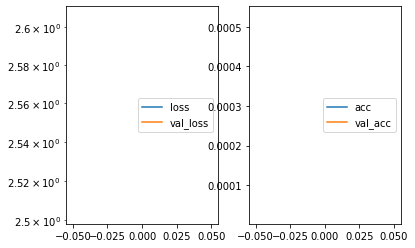

Predicted cell: MatureP1 Probability: [[0.37509814]]
True Cell type: MatureP1
X [[0.45476842]]
True positional value X 0.5
Y [[0.521598]]
True positional value Y 0.5
H [[0.5346833]]
True positional value H 0.2962962962962963
W [[0.37558347]]
True positional value W 0.3148148148148148
C [[0.49975723]]
True positional value C 1.0


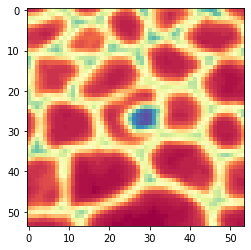

Epoch 2/250
36076/36076 [==============================] - 26s 722us/step - loss: 2.3935 - acc: 0.0000e+00 - val_loss: 2.3971 - val_acc: 0.0000e+00

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.397100115274366, 'val_acc': 0.0, 'loss': 2.393532481290295, 'acc': 0.0, 'lr': 1e-06}


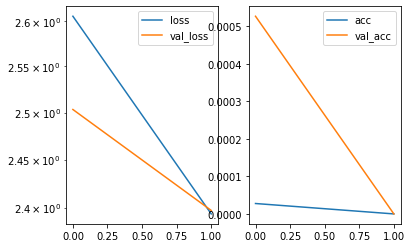

Predicted cell: MacroCheate Probability: [[0.6406757]]
True Cell type: MacroCheate
X [[0.51348215]]
True positional value X 0.5
Y [[0.73271286]]
True positional value Y 0.6851851851851852
H [[0.32268158]]
True positional value H 0.7222222222222222
W [[0.5016234]]
True positional value W 0.7222222222222222
C [[0.4143719]]
True positional value C 1.0


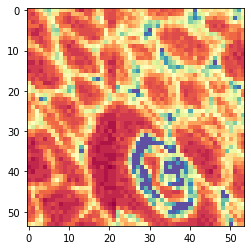

Epoch 3/250
36076/36076 [==============================] - 26s 720us/step - loss: 2.2650 - acc: 8.3158e-05 - val_loss: 2.3780 - val_acc: 5.2659e-04

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.3779517788206546, 'val_acc': 0.0005265929318842855, 'loss': 2.2649916120584797, 'acc': 8.315777616545002e-05, 'lr': 1e-06}


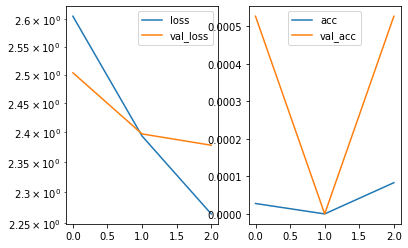

Predicted cell: Normal Probability: [[0.29195437]]
True Cell type: MatureP1
X [[0.4258083]]
True positional value X 0.3148148148148148
Y [[0.67578673]]
True positional value Y 0.5
H [[0.37801874]]
True positional value H 0.37037037037037035
W [[0.45056957]]
True positional value W 0.2962962962962963
C [[0.4825079]]
True positional value C 1.0


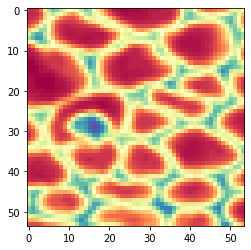

Epoch 4/250
36076/36076 [==============================] - 26s 717us/step - loss: 2.1473 - acc: 2.7719e-04 - val_loss: 4.5991 - val_acc: 0.0011

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 4.599142348282961, 'val_acc': 0.001053185863768571, 'loss': 2.1472610834763337, 'acc': 0.00027719258804426503, 'lr': 1e-06}


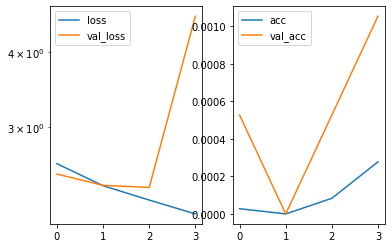

Predicted cell: MatureP1 Probability: [[0.51940763]]
True Cell type: Normal
X [[0.49542904]]
True positional value X 0.5
Y [[0.5599302]]
True positional value Y 0.5
H [[0.44707716]]
True positional value H 0.5185185185185185
W [[0.40955675]]
True positional value W 0.7222222222222222
C [[0.6852701]]
True positional value C 1.0


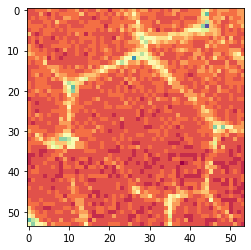

Epoch 5/250
36076/36076 [==============================] - 26s 717us/step - loss: 2.0514 - acc: 0.0011 - val_loss: 2.1074 - val_acc: 0.0053

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.1073606358257453, 'val_acc': 0.005265929318842855, 'loss': 2.0513818461478106, 'acc': 0.0011087703488726669, 'lr': 1e-06}


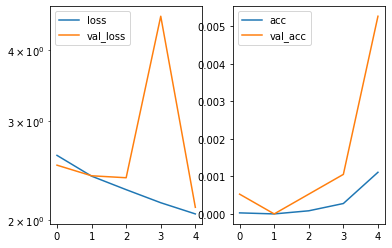

Predicted cell: MacroCheate Probability: [[0.4760289]]
True Cell type: NonMatureP1
X [[0.5585642]]
True positional value X 0.5
Y [[0.533039]]
True positional value Y 0.5
H [[0.60261357]]
True positional value H 0.3333333333333333
W [[0.45522317]]
True positional value W 0.24074074074074073
C [[0.6264741]]
True positional value C 1.0


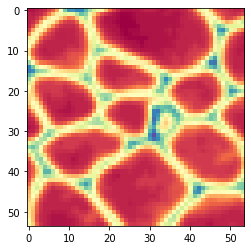

Epoch 6/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.9737 - acc: 0.0040 - val_loss: 2.0562 - val_acc: 0.0079

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.056240737030166, 'val_acc': 0.007898893989544124, 'loss': 1.973686492817142, 'acc': 0.0039915732559416, 'lr': 1e-06}


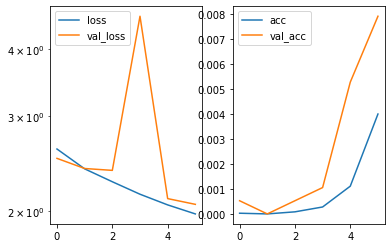

Predicted cell: MatureP1 Probability: [[0.53458434]]
True Cell type: MatureP1
X [[0.5238038]]
True positional value X 0.5
Y [[0.40308154]]
True positional value Y 0.3148148148148148
H [[0.5306101]]
True positional value H 0.2222222222222222
W [[0.3367944]]
True positional value W 0.2962962962962963
C [[0.5203766]]
True positional value C 1.0


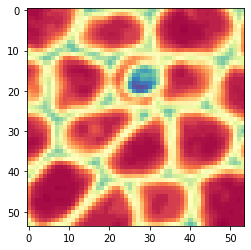

Epoch 7/250
36076/36076 [==============================] - 26s 720us/step - loss: 1.8997 - acc: 0.0065 - val_loss: 1.9717 - val_acc: 0.0111

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.9717034693452293, 'val_acc': 0.011058451592129679, 'loss': 1.8996987773727347, 'acc': 0.006458587283009382, 'lr': 1e-06}


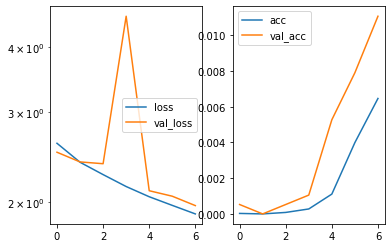

Predicted cell: Normal Probability: [[0.3009112]]
True Cell type: NonMatureP1
X [[0.53332317]]
True positional value X 0.3148148148148148
Y [[0.49249506]]
True positional value Y 0.3148148148148148
H [[0.46145803]]
True positional value H 0.48148148148148145
W [[0.37271148]]
True positional value W 0.4444444444444444
C [[0.58301204]]
True positional value C 1.0


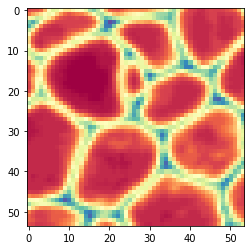

Epoch 8/250
36076/36076 [==============================] - 26s 715us/step - loss: 1.8360 - acc: 0.0119 - val_loss: 2.0587 - val_acc: 0.0153

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.058702754183403, 'val_acc': 0.015271195107036166, 'loss': 1.8360202601405624, 'acc': 0.01189156200281168, 'lr': 1e-06}


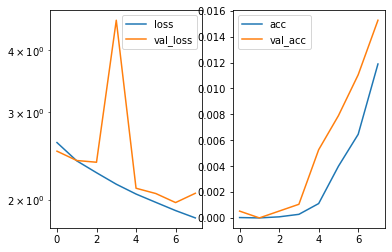

Predicted cell: MacroCheate Probability: [[0.39672714]]
True Cell type: MacroCheate
X [[0.648054]]
True positional value X 0.6851851851851852
Y [[0.3990753]]
True positional value Y 0.3148148148148148
H [[0.4828576]]
True positional value H 0.6296296296296297
W [[0.43845016]]
True positional value W 0.6481481481481481
C [[0.4826803]]
True positional value C 1.0


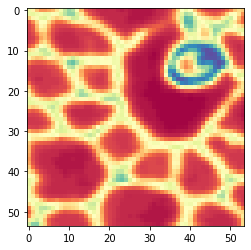

Epoch 9/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.7790 - acc: 0.0162 - val_loss: 1.8527 - val_acc: 0.0211

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.852657611461738, 'val_acc': 0.021063717283218267, 'loss': 1.7789814187624142, 'acc': 0.016160327877776232, 'lr': 1e-06}


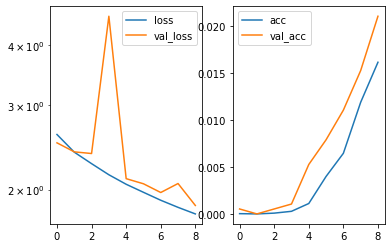

Predicted cell: MacroCheate Probability: [[0.44582716]]
True Cell type: MatureP1
X [[0.44450322]]
True positional value X 0.5
Y [[0.5175198]]
True positional value Y 0.5
H [[0.40006337]]
True positional value H 0.35185185185185186
W [[0.47713774]]
True positional value W 0.3148148148148148
C [[0.56733775]]
True positional value C 1.0


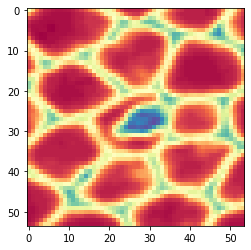

Epoch 10/250
36076/36076 [==============================] - 26s 722us/step - loss: 1.7262 - acc: 0.0228 - val_loss: 1.8071 - val_acc: 0.0274

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.8071001395857793, 'val_acc': 0.0273828327208522, 'loss': 1.7262380419608587, 'acc': 0.022757511514699874, 'lr': 1e-06}


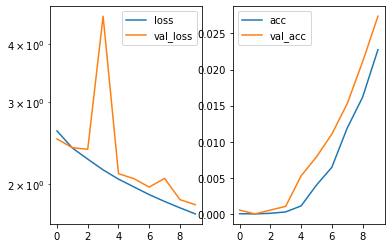

Predicted cell: MatureP1 Probability: [[0.33161]]
True Cell type: NonMatureP1
X [[0.50033945]]
True positional value X 0.3148148148148148
Y [[0.594825]]
True positional value Y 0.6851851851851852
H [[0.55320317]]
True positional value H 0.2962962962962963
W [[0.41483873]]
True positional value W 0.2222222222222222
C [[0.65572095]]
True positional value C 1.0


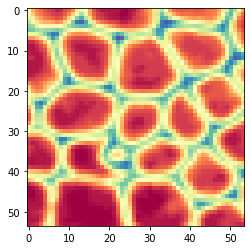

Epoch 11/250
36076/36076 [==============================] - 26s 725us/step - loss: 1.6725 - acc: 0.0292 - val_loss: 7.6007 - val_acc: 0.0358

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 7.600720975071333, 'val_acc': 0.035808319670235, 'loss': 1.6725273037157695, 'acc': 0.02924381817869362, 'lr': 1e-06}


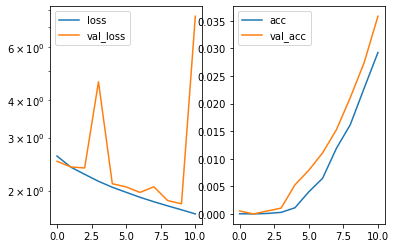

Predicted cell: NonMatureP1 Probability: [[0.38788605]]
True Cell type: NonMatureP1
X [[0.5412336]]
True positional value X 0.5
Y [[0.4470543]]
True positional value Y 0.6851851851851852
H [[0.43502706]]
True positional value H 0.37037037037037035
W [[0.47379613]]
True positional value W 0.3333333333333333
C [[0.50490683]]
True positional value C 1.0


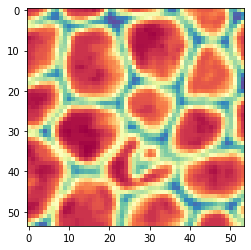

Epoch 12/250
36076/36076 [==============================] - 26s 720us/step - loss: 1.6232 - acc: 0.0362 - val_loss: 1.6892 - val_acc: 0.0479

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.6892499026654582, 'val_acc': 0.04791995702902853, 'loss': 1.6232478064541171, 'acc': 0.03620135227606743, 'lr': 1e-06}


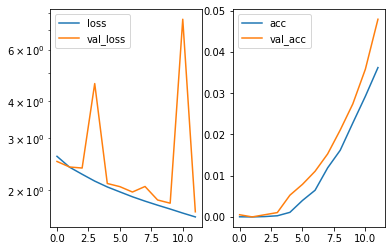

Predicted cell: Normal Probability: [[0.36637998]]
True Cell type: Normal
X [[0.54209095]]
True positional value X 0.5
Y [[0.50390196]]
True positional value Y 0.5
H [[0.4513619]]
True positional value H 0.4074074074074074
W [[0.4876137]]
True positional value W 0.6111111111111112
C [[0.55913943]]
True positional value C 1.0


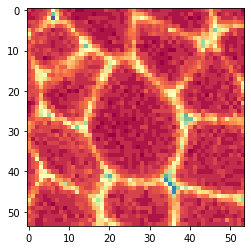

Epoch 13/250
36076/36076 [==============================] - 26s 718us/step - loss: 1.5797 - acc: 0.0434 - val_loss: 1.6676 - val_acc: 0.0537

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.6676050872787669, 'val_acc': 0.05371247982903491, 'loss': 1.5797219689080848, 'acc': 0.04338064043743309, 'lr': 1e-06}


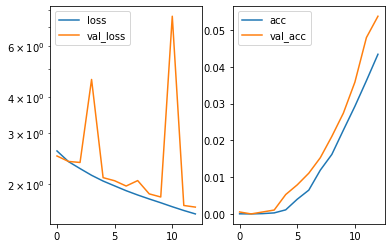

Predicted cell: Normal Probability: [[0.41938174]]
True Cell type: NonMatureP1
X [[0.5747722]]
True positional value X 0.6851851851851852
Y [[0.54063946]]
True positional value Y 0.6851851851851852
H [[0.42069018]]
True positional value H 0.3888888888888889
W [[0.50272274]]
True positional value W 0.37037037037037035
C [[0.54673064]]
True positional value C 1.0


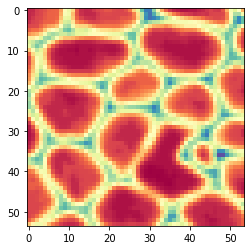

Epoch 14/250
36076/36076 [==============================] - 26s 716us/step - loss: 1.5364 - acc: 0.0507 - val_loss: 2.2221 - val_acc: 0.0595

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 2.222124290127325, 'val_acc': 0.05950500247210437, 'loss': 1.5363931256184387, 'acc': 0.05072624438842638, 'lr': 1e-06}


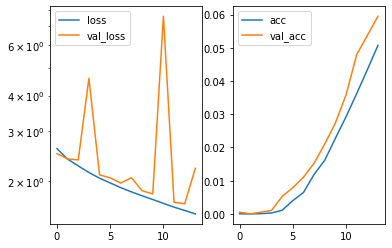

Predicted cell: MacroCheate Probability: [[0.68248826]]
True Cell type: MacroCheate
X [[0.61823636]]
True positional value X 0.6851851851851852
Y [[0.686363]]
True positional value Y 0.6851851851851852
H [[0.5708134]]
True positional value H 0.18518518518518517
W [[0.5918035]]
True positional value W 0.18518518518518517
C [[0.3792935]]
True positional value C 0.0


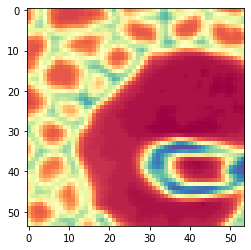

Epoch 15/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.4974 - acc: 0.0577 - val_loss: 1.6504 - val_acc: 0.0711

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.6503843453885882, 'val_acc': 0.07109004726781538, 'loss': 1.4974091458259817, 'acc': 0.0576560592743725, 'lr': 1e-06}


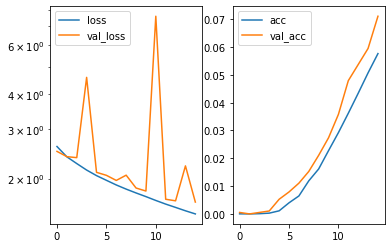

Predicted cell: MacroCheate Probability: [[0.94107944]]
True Cell type: MacroCheate
X [[0.3802191]]
True positional value X 0.5
Y [[0.43431455]]
True positional value Y 0.3148148148148148
H [[0.52805924]]
True positional value H 0.7037037037037037
W [[0.70871866]]
True positional value W 0.7962962962962963
C [[0.51174384]]
True positional value C 1.0


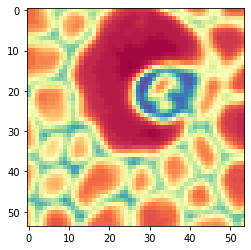

Epoch 16/250
36076/36076 [==============================] - 26s 720us/step - loss: 1.4546 - acc: 0.0656 - val_loss: 1.5315 - val_acc: 0.0732

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.5314744655680443, 'val_acc': 0.07319641928960927, 'loss': 1.4545987090536807, 'acc': 0.06555604820050591, 'lr': 1e-06}


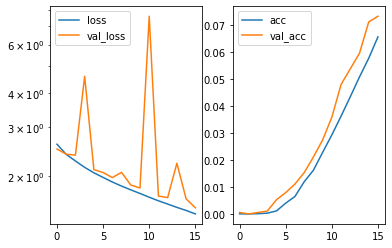

Predicted cell: MatureP1 Probability: [[0.69790876]]
True Cell type: MatureP1
X [[0.5446078]]
True positional value X 0.3148148148148148
Y [[0.37073997]]
True positional value Y 0.3148148148148148
H [[0.5245354]]
True positional value H 0.3888888888888889
W [[0.4671769]]
True positional value W 0.4074074074074074
C [[0.60415834]]
True positional value C 1.0


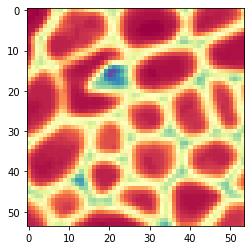

Epoch 17/250
36076/36076 [==============================] - 26s 716us/step - loss: 1.4208 - acc: 0.0755 - val_loss: 1.5413 - val_acc: 0.0816

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.5413166717079327, 'val_acc': 0.0816219066509515, 'loss': 1.420831859012654, 'acc': 0.07553498180049667, 'lr': 1e-06}


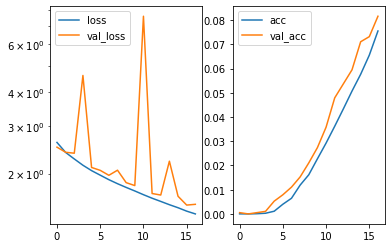

Predicted cell: MacroCheate Probability: [[0.858725]]
True Cell type: MacroCheate
X [[0.5765277]]
True positional value X 0.6851851851851852
Y [[0.45570317]]
True positional value Y 0.3148148148148148
H [[0.466682]]
True positional value H 0.9259259259259259
W [[0.39800757]]
True positional value W 0.9444444444444444
C [[0.4844501]]
True positional value C 1.0


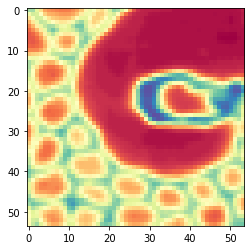

Epoch 18/250
36076/36076 [==============================] - 26s 717us/step - loss: 1.3851 - acc: 0.0816 - val_loss: 1.4735 - val_acc: 0.0869

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.4734858313380197, 'val_acc': 0.08688783603256912, 'loss': 1.3850659756930628, 'acc': 0.0815777802850821, 'lr': 1e-06}


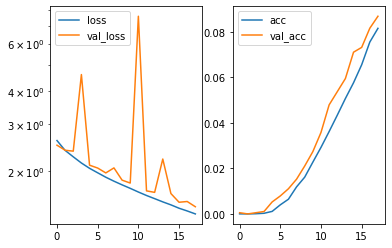

Predicted cell: Normal Probability: [[0.5253148]]
True Cell type: Normal
X [[0.5973181]]
True positional value X 0.5
Y [[0.5411323]]
True positional value Y 0.5
H [[0.49892378]]
True positional value H 0.2777777777777778
W [[0.41695344]]
True positional value W 0.25925925925925924
C [[0.5439052]]
True positional value C 1.0


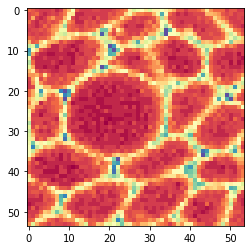

Epoch 19/250
36076/36076 [==============================] - 26s 718us/step - loss: 1.3534 - acc: 0.0896 - val_loss: 1.5020 - val_acc: 0.1001

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.5020425801154123, 'val_acc': 0.10005265830958623, 'loss': 1.3534029599025965, 'acc': 0.08961636551907479, 'lr': 1e-06}


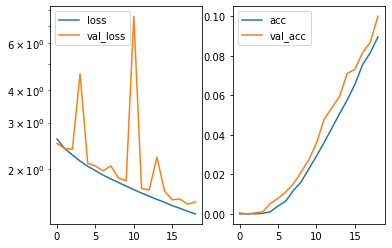

Predicted cell: MatureP1 Probability: [[0.6062075]]
True Cell type: MatureP1
X [[0.4621395]]
True positional value X 0.3148148148148148
Y [[0.43823585]]
True positional value Y 0.3148148148148148
H [[0.52551734]]
True positional value H 0.3888888888888889
W [[0.45974714]]
True positional value W 0.3333333333333333
C [[0.6043927]]
True positional value C 1.0


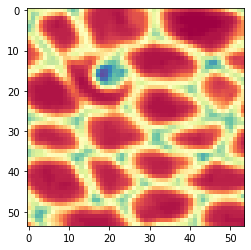

Epoch 20/250
36076/36076 [==============================] - 26s 715us/step - loss: 1.3225 - acc: 0.1012 - val_loss: 1.4009 - val_acc: 0.1095

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.4008817935755782, 'val_acc': 0.10953133120512949, 'loss': 1.322526328525888, 'acc': 0.10117529650974769, 'lr': 1e-06}


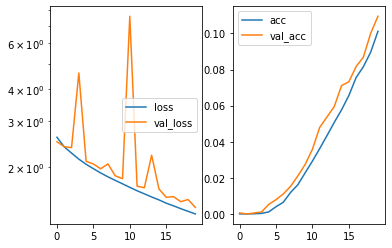

Predicted cell: MatureP1 Probability: [[0.34966993]]
True Cell type: NonMatureP1
X [[0.46964455]]
True positional value X 0.6851851851851852
Y [[0.4472012]]
True positional value Y 0.3148148148148148
H [[0.5167389]]
True positional value H 0.3148148148148148
W [[0.361366]]
True positional value W 0.3888888888888889
C [[0.56757164]]
True positional value C 1.0


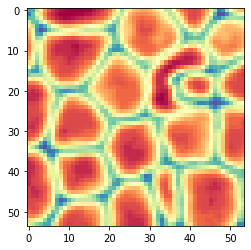

Epoch 21/250
36076/36076 [==============================] - 26s 718us/step - loss: 1.2939 - acc: 0.1107 - val_loss: 1.4160 - val_acc: 0.1227

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.4160225869731693, 'val_acc': 0.12269615544778162, 'loss': 1.2938593363521342, 'acc': 0.11071072157428176, 'lr': 1e-06}


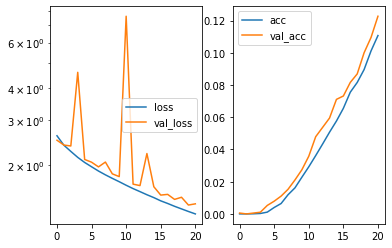

Predicted cell: MatureP1 Probability: [[0.53950876]]
True Cell type: MacroCheate
X [[0.60332656]]
True positional value X 0.5
Y [[0.46419168]]
True positional value Y 0.3148148148148148
H [[0.45952505]]
True positional value H 0.5
W [[0.501569]]
True positional value W 0.5740740740740741
C [[0.50508785]]
True positional value C 1.0


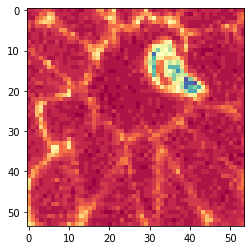

Epoch 22/250
36076/36076 [==============================] - 26s 718us/step - loss: 1.2666 - acc: 0.1197 - val_loss: 1.3478 - val_acc: 0.1316

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.3477998468485426, 'val_acc': 0.13164823661985492, 'loss': 1.2665782334574813, 'acc': 0.11974719993514858, 'lr': 1e-06}


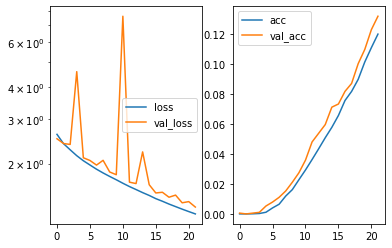

Predicted cell: MacroCheate Probability: [[0.9963815]]
True Cell type: MacroCheate
X [[0.6476709]]
True positional value X 0.6851851851851852
Y [[0.3481643]]
True positional value Y 0.5
H [[0.43582585]]
True positional value H 0.48148148148148145
W [[0.601305]]
True positional value W 0.48148148148148145
C [[0.39643976]]
True positional value C 1.0


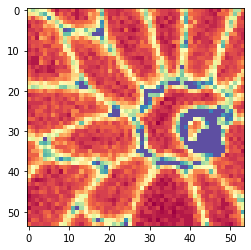

Epoch 23/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.2419 - acc: 0.1299 - val_loss: 1.3218 - val_acc: 0.1411

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.3218359274886795, 'val_acc': 0.14112690932315045, 'loss': 1.2419200492600457, 'acc': 0.12986472980871555, 'lr': 1e-06}


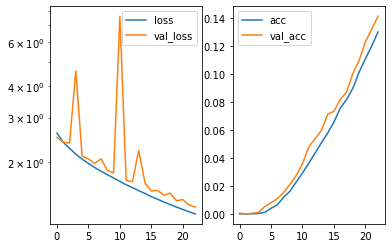

Predicted cell: MatureP1 Probability: [[0.49048144]]
True Cell type: MacroCheate
X [[0.53299606]]
True positional value X 0.5
Y [[0.5132462]]
True positional value Y 0.6851851851851852
H [[0.4803061]]
True positional value H 0.9629629629629629
W [[0.53891516]]
True positional value W 0.7592592592592593
C [[0.58197993]]
True positional value C 1.0


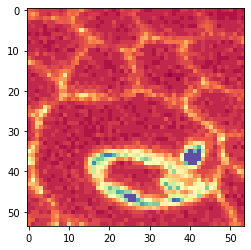

Epoch 24/250
36076/36076 [==============================] - 26s 718us/step - loss: 1.2186 - acc: 0.1422 - val_loss: 1.2976 - val_acc: 0.1548

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.297648095155528, 'val_acc': 0.1548183252147275, 'loss': 1.2186050078519657, 'acc': 0.1422275199408951, 'lr': 1e-06}


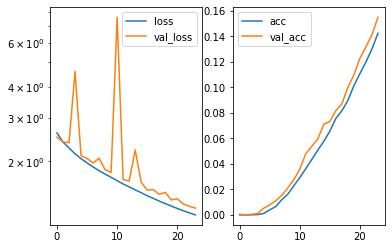

Predicted cell: MatureP1 Probability: [[0.597576]]
True Cell type: MatureP1
X [[0.5489015]]
True positional value X 0.5
Y [[0.5519652]]
True positional value Y 0.6851851851851852
H [[0.47906807]]
True positional value H 0.4074074074074074
W [[0.57415307]]
True positional value W 0.4074074074074074
C [[0.51847816]]
True positional value C 1.0


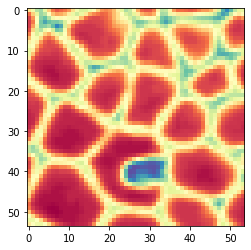

Epoch 25/250
36076/36076 [==============================] - 26s 717us/step - loss: 1.1955 - acc: 0.1492 - val_loss: 1.3309 - val_acc: 0.1611

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.3309094610184102, 'val_acc': 0.16113744104862715, 'loss': 1.1955351189005228, 'acc': 0.14924049307842624, 'lr': 1e-06}


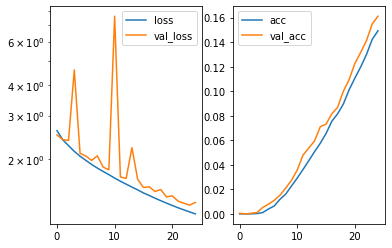

Predicted cell: NonMatureP1 Probability: [[0.54929715]]
True Cell type: NonMatureP1
X [[0.5452439]]
True positional value X 0.6851851851851852
Y [[0.5624445]]
True positional value Y 0.6851851851851852
H [[0.48773757]]
True positional value H 0.3333333333333333
W [[0.49631214]]
True positional value W 0.3333333333333333
C [[0.5035286]]
True positional value C 1.0


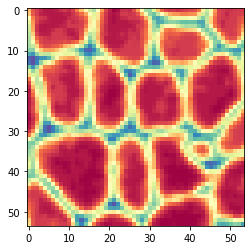

Epoch 26/250
36076/36076 [==============================] - 26s 715us/step - loss: 1.1721 - acc: 0.1615 - val_loss: 1.2522 - val_acc: 0.1738

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.2521742692804763, 'val_acc': 0.17377567128045363, 'loss': 1.1721122432791324, 'acc': 0.1615478436816048, 'lr': 1e-06}


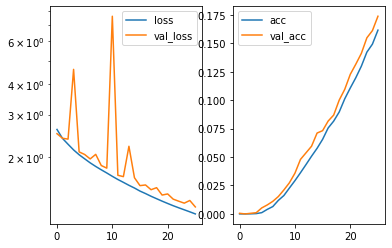

Predicted cell: MacroCheate Probability: [[0.74215853]]
True Cell type: MacroCheate
X [[0.6643206]]
True positional value X 0.5
Y [[0.53802425]]
True positional value Y 0.6851851851851852
H [[0.53928196]]
True positional value H 0.8333333333333334
W [[0.75734735]]
True positional value W 0.7962962962962963
C [[0.39064056]]
True positional value C 1.0


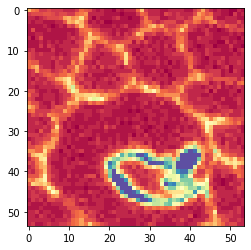

Epoch 27/250
36076/36076 [==============================] - 26s 717us/step - loss: 1.1533 - acc: 0.1701 - val_loss: 1.2292 - val_acc: 0.1817

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.2291893782648304, 'val_acc': 0.18167456521556025, 'loss': 1.153320790830744, 'acc': 0.17005765645513118, 'lr': 1e-06}


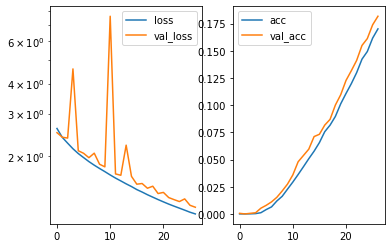

Predicted cell: NonMatureP1 Probability: [[0.5095945]]
True Cell type: NonMatureP1
X [[0.60096693]]
True positional value X 0.6851851851851852
Y [[0.53705454]]
True positional value Y 0.6851851851851852
H [[0.51785004]]
True positional value H 0.35185185185185186
W [[0.57117295]]
True positional value W 0.35185185185185186
C [[0.48128086]]
True positional value C 1.0


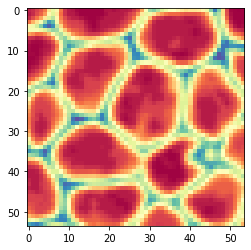

Epoch 28/250
36076/36076 [==============================] - 26s 715us/step - loss: 1.1336 - acc: 0.1819 - val_loss: 1.2135 - val_acc: 0.1922

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.2134928137079675, 'val_acc': 0.19220642515582245, 'loss': 1.1335639775043873, 'acc': 0.1818937801823395, 'lr': 1e-06}


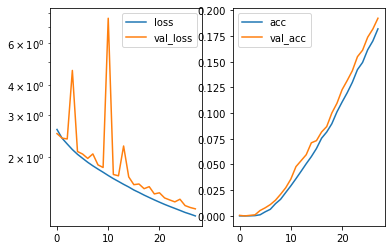

Predicted cell: Normal Probability: [[0.39268032]]
True Cell type: Normal
X [[0.5162767]]
True positional value X 0.5
Y [[0.5378813]]
True positional value Y 0.5
H [[0.413881]]
True positional value H 0.2962962962962963
W [[0.49733204]]
True positional value W 0.5
C [[0.5323812]]
True positional value C 1.0


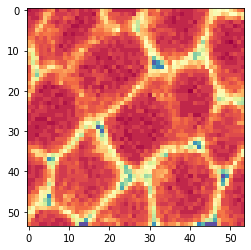

Epoch 29/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.1144 - acc: 0.1917 - val_loss: 1.1909 - val_acc: 0.2048

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1908847838090935, 'val_acc': 0.20484465526209938, 'loss': 1.1143881587049547, 'acc': 0.1916786784440203, 'lr': 1e-06}


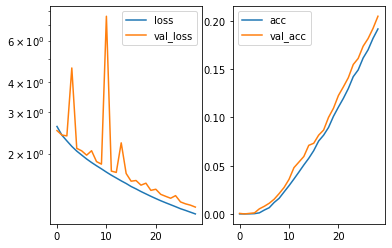

Predicted cell: MacroCheate Probability: [[0.99928397]]
True Cell type: MacroCheate
X [[0.3710482]]
True positional value X 0.5
Y [[0.5459224]]
True positional value Y 0.5
H [[0.5367422]]
True positional value H 0.5370370370370371
W [[0.5892657]]
True positional value W 0.5185185185185185
C [[0.47064856]]
True positional value C 1.0


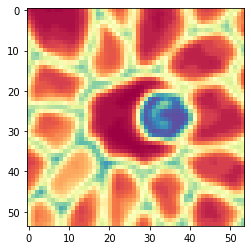

Epoch 30/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.0964 - acc: 0.2019 - val_loss: 1.1730 - val_acc: 0.2138

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1730435704984057, 'val_acc': 0.21379673408796562, 'loss': 1.0963794967527862, 'acc': 0.2018516467503558, 'lr': 1e-06}


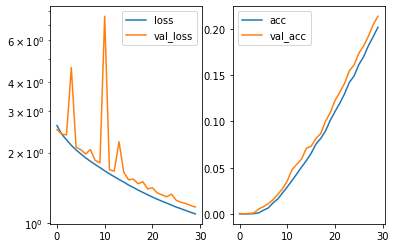

Predicted cell: MatureP1 Probability: [[0.5451826]]
True Cell type: MatureP1
X [[0.46899357]]
True positional value X 0.5
Y [[0.4963892]]
True positional value Y 0.5
H [[0.47190437]]
True positional value H 0.35185185185185186
W [[0.44722426]]
True positional value W 0.4074074074074074
C [[0.5643304]]
True positional value C 1.0


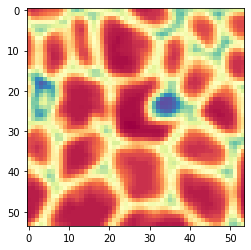

Epoch 31/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.0789 - acc: 0.2118 - val_loss: 1.1564 - val_acc: 0.2264

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1564180974021216, 'val_acc': 0.22643496602255775, 'loss': 1.0788890942922915, 'acc': 0.2118028608440018, 'lr': 1e-06}


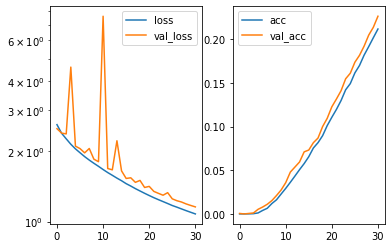

Predicted cell: MatureP1 Probability: [[0.6831666]]
True Cell type: MatureP1
X [[0.47859094]]
True positional value X 0.3148148148148148
Y [[0.5356089]]
True positional value Y 0.6851851851851852
H [[0.5133094]]
True positional value H 0.5185185185185185
W [[0.46107405]]
True positional value W 0.5
C [[0.5957215]]
True positional value C 1.0


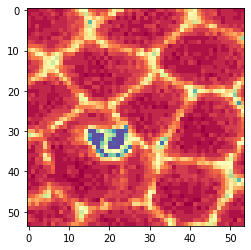

Epoch 32/250
36076/36076 [==============================] - 26s 720us/step - loss: 1.0636 - acc: 0.2188 - val_loss: 1.1395 - val_acc: 0.2364

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1394718130241261, 'val_acc': 0.23644023050817456, 'loss': 1.0636173096526844, 'acc': 0.2187881134983269, 'lr': 1e-06}


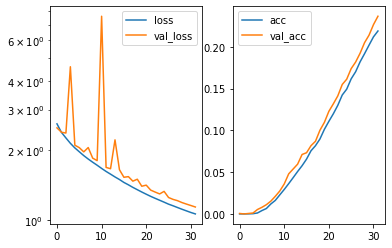

Predicted cell: MatureP1 Probability: [[0.68194705]]
True Cell type: MatureP1
X [[0.5480431]]
True positional value X 0.6851851851851852
Y [[0.5087429]]
True positional value Y 0.5
H [[0.509598]]
True positional value H 0.4444444444444444
W [[0.47960472]]
True positional value W 0.35185185185185186
C [[0.5823319]]
True positional value C 1.0


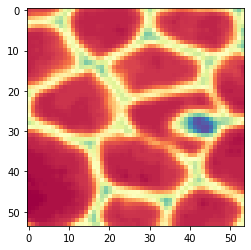

Epoch 33/250
36076/36076 [==============================] - 26s 720us/step - loss: 1.0482 - acc: 0.2309 - val_loss: 1.1260 - val_acc: 0.2407

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1260368006049866, 'val_acc': 0.2406529768508883, 'loss': 1.0481748493696637, 'acc': 0.23092914890563598, 'lr': 1e-06}


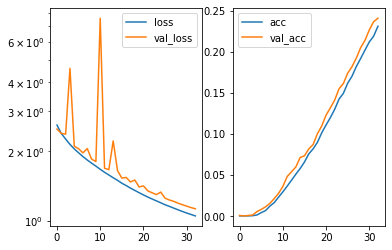

Predicted cell: Normal Probability: [[0.6727812]]
True Cell type: Normal
X [[0.57762223]]
True positional value X 0.5
Y [[0.53777266]]
True positional value Y 0.5
H [[0.57673067]]
True positional value H 0.4074074074074074
W [[0.6068154]]
True positional value W 0.3333333333333333
C [[0.51224524]]
True positional value C 1.0


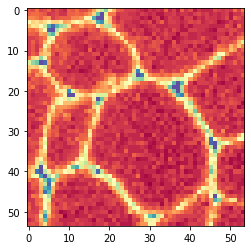

Epoch 34/250
36076/36076 [==============================] - 26s 715us/step - loss: 1.0316 - acc: 0.2410 - val_loss: 1.1080 - val_acc: 0.2491

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.1080156446695955, 'val_acc': 0.24907846296065855, 'loss': 1.0315787318686263, 'acc': 0.24104667916003425, 'lr': 1e-06}


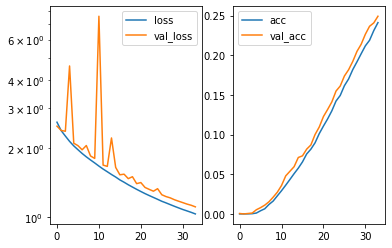

Predicted cell: MacroCheate Probability: [[0.9927632]]
True Cell type: MacroCheate
X [[0.3349419]]
True positional value X 0.5
Y [[0.4124378]]
True positional value Y 0.5
H [[0.42703676]]
True positional value H 0.5925925925925926
W [[0.5554844]]
True positional value W 0.5925925925925926
C [[0.50880563]]
True positional value C 1.0


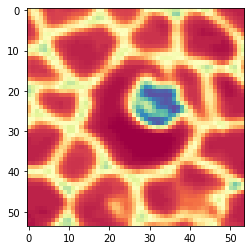

Epoch 35/250
36076/36076 [==============================] - 26s 721us/step - loss: 1.0163 - acc: 0.2487 - val_loss: 1.0978 - val_acc: 0.2486

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0978285002670771, 'val_acc': 0.24855187051920216, 'loss': 1.0163343635349822, 'acc': 0.24869719490182546, 'lr': 1e-06}


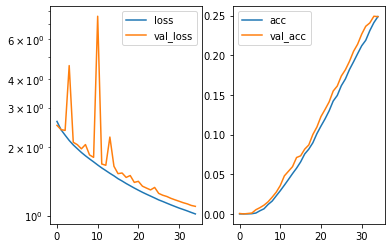

Predicted cell: MatureP1 Probability: [[0.8534049]]
True Cell type: MatureP1
X [[0.5498814]]
True positional value X 0.3148148148148148
Y [[0.45672065]]
True positional value Y 0.6851851851851852
H [[0.36106274]]
True positional value H 0.3888888888888889
W [[0.36800885]]
True positional value W 0.3148148148148148
C [[0.5695993]]
True positional value C 1.0


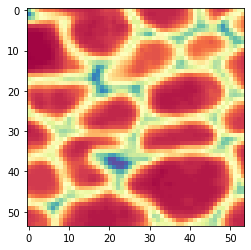

Epoch 36/250
36076/36076 [==============================] - 26s 719us/step - loss: 1.0024 - acc: 0.2585 - val_loss: 1.0816 - val_acc: 0.2722

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0815896151755093, 'val_acc': 0.2722485523402157, 'loss': 1.0023562529687409, 'acc': 0.25853753145088154, 'lr': 1e-06}


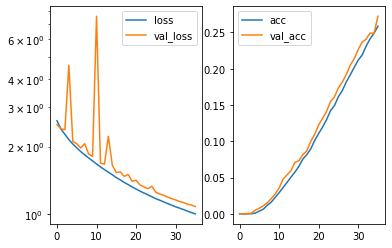

Predicted cell: Normal Probability: [[0.52589524]]
True Cell type: Normal
X [[0.4676848]]
True positional value X 0.5
Y [[0.5974445]]
True positional value Y 0.5
H [[0.49985862]]
True positional value H 0.3333333333333333
W [[0.48175088]]
True positional value W 0.6111111111111112
C [[0.49350438]]
True positional value C 1.0


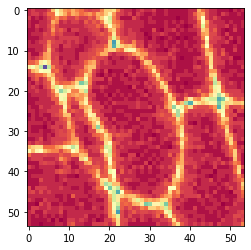

Epoch 37/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.9864 - acc: 0.2700 - val_loss: 1.0605 - val_acc: 0.2686

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0604668088559417, 'val_acc': 0.2685624010754988, 'loss': 0.986400664923315, 'acc': 0.2699855862362764, 'lr': 1e-06}


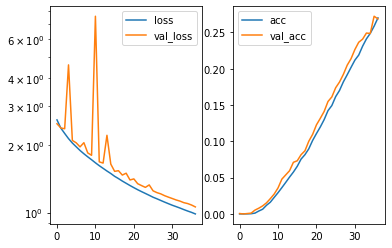

Predicted cell: NonMatureP1 Probability: [[0.6006906]]
True Cell type: NonMatureP1
X [[0.40749764]]
True positional value X 0.3148148148148148
Y [[0.48702168]]
True positional value Y 0.3148148148148148
H [[0.46776313]]
True positional value H 0.3888888888888889
W [[0.42491367]]
True positional value W 0.3888888888888889
C [[0.52741027]]
True positional value C 1.0


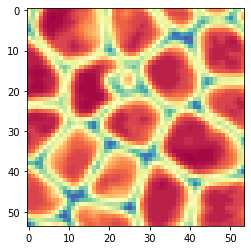

Epoch 38/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.9731 - acc: 0.2808 - val_loss: 1.0492 - val_acc: 0.2812

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0492286819605654, 'val_acc': 0.28120063142502794, 'loss': 0.9730934288089615, 'acc': 0.2807960985359562, 'lr': 1e-06}


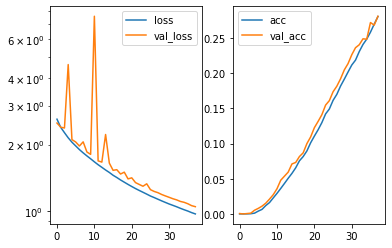

Predicted cell: MatureP1 Probability: [[0.9079697]]
True Cell type: MatureP1
X [[0.58371717]]
True positional value X 0.6851851851851852
Y [[0.47711062]]
True positional value Y 0.3148148148148148
H [[0.38243562]]
True positional value H 0.2962962962962963
W [[0.31889433]]
True positional value W 0.2777777777777778
C [[0.56780756]]
True positional value C 1.0


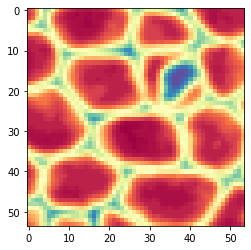

Epoch 39/250
36076/36076 [==============================] - 26s 719us/step - loss: 0.9609 - acc: 0.2880 - val_loss: 1.0323 - val_acc: 0.2928

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0323387617309072, 'val_acc': 0.2927856776763289, 'loss': 0.960875825542795, 'acc': 0.2879753857999726, 'lr': 1e-06}


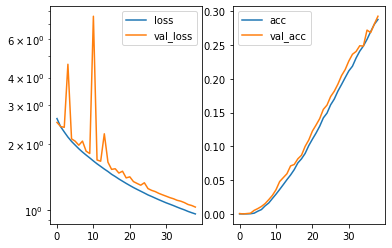

Predicted cell: NonMatureP1 Probability: [[0.49726418]]
True Cell type: NonMatureP1
X [[0.4950114]]
True positional value X 0.5
Y [[0.520984]]
True positional value Y 0.6851851851851852
H [[0.49309593]]
True positional value H 0.25925925925925924
W [[0.39427504]]
True positional value W 0.2962962962962963
C [[0.56435984]]
True positional value C 1.0


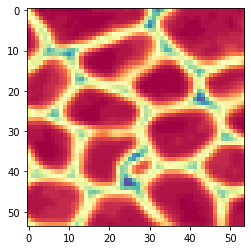

Epoch 40/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.9451 - acc: 0.2997 - val_loss: 1.0181 - val_acc: 0.2991

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0181306979730294, 'val_acc': 0.29910479376917454, 'loss': 0.9451306787440195, 'acc': 0.29972835239516565, 'lr': 1e-06}


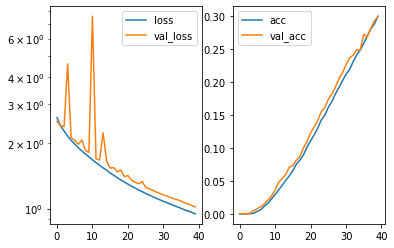

Predicted cell: MacroCheate Probability: [[0.9892641]]
True Cell type: MacroCheate
X [[0.52375555]]
True positional value X 0.3148148148148148
Y [[0.5590656]]
True positional value Y 0.6851851851851852
H [[0.57229245]]
True positional value H 0.5925925925925926
W [[0.5975155]]
True positional value W 0.5370370370370371
C [[0.6060244]]
True positional value C 1.0


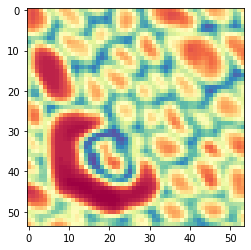

Epoch 41/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.9317 - acc: 0.3145 - val_loss: 1.0106 - val_acc: 0.3070

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 1.0105785971067025, 'val_acc': 0.30700368980723597, 'loss': 0.9316968541079765, 'acc': 0.3145304378417421, 'lr': 1e-06}


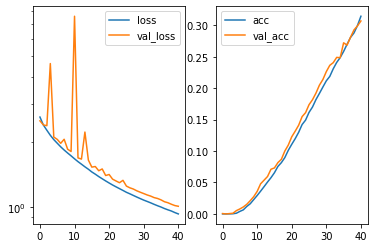

Predicted cell: MacroCheate Probability: [[0.9984012]]
True Cell type: MacroCheate
X [[0.39298773]]
True positional value X 0.5
Y [[0.5063303]]
True positional value Y 0.5
H [[0.6386402]]
True positional value H 0.5925925925925926
W [[0.6172708]]
True positional value W 0.6111111111111112
C [[0.39779156]]
True positional value C 1.0


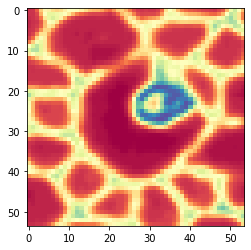

Epoch 42/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.9202 - acc: 0.3196 - val_loss: 0.9933 - val_acc: 0.3181

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9933073469185089, 'val_acc': 0.318062140227243, 'loss': 0.9202079907239759, 'acc': 0.3195753429757873, 'lr': 1e-06}


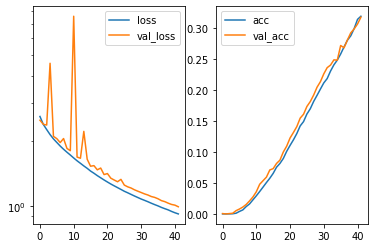

Predicted cell: MacroCheate Probability: [[0.99562716]]
True Cell type: MacroCheate
X [[0.5373624]]
True positional value X 0.5
Y [[0.38741657]]
True positional value Y 0.3148148148148148
H [[0.54159284]]
True positional value H 0.18518518518518517
W [[0.60821915]]
True positional value W 0.18518518518518517
C [[0.52462864]]
True positional value C 0.0


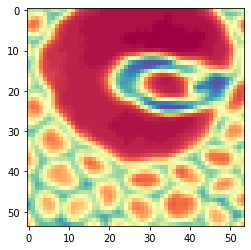

Epoch 43/250
36076/36076 [==============================] - 26s 722us/step - loss: 0.9078 - acc: 0.3323 - val_loss: 0.9817 - val_acc: 0.3412

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9817042719884694, 'val_acc': 0.3412322288221155, 'loss': 0.907785050454485, 'acc': 0.3322707631279616, 'lr': 1e-06}


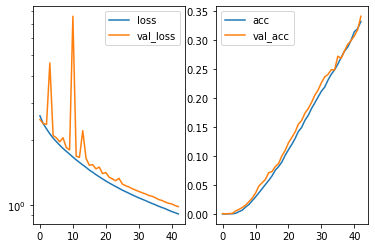

Predicted cell: NonMatureP1 Probability: [[0.7321125]]
True Cell type: NonMatureP1
X [[0.47522897]]
True positional value X 0.3148148148148148
Y [[0.5158107]]
True positional value Y 0.5
H [[0.3872905]]
True positional value H 0.3333333333333333
W [[0.44888777]]
True positional value W 0.24074074074074073
C [[0.58335674]]
True positional value C 1.0


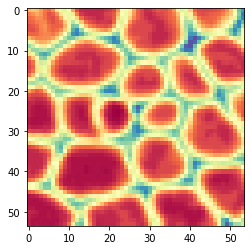

Epoch 44/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.8973 - acc: 0.3498 - val_loss: 0.9720 - val_acc: 0.3418

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9720367495482567, 'val_acc': 0.3417588202277882, 'loss': 0.8973433085034593, 'acc': 0.34976161433166353, 'lr': 1e-06}


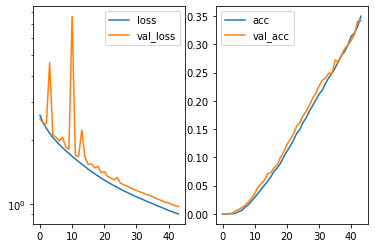

Predicted cell: MatureP1 Probability: [[0.69425285]]
True Cell type: MatureP1
X [[0.508021]]
True positional value X 0.6851851851851852
Y [[0.40406165]]
True positional value Y 0.5
H [[0.48848933]]
True positional value H 0.3333333333333333
W [[0.47411537]]
True positional value W 0.48148148148148145
C [[0.536535]]
True positional value C 1.0


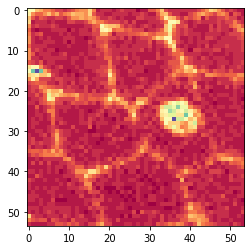

Epoch 45/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.8889 - acc: 0.3542 - val_loss: 0.9556 - val_acc: 0.3633

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9555646697115182, 'val_acc': 0.36334913071360697, 'loss': 0.8888539202277524, 'acc': 0.3541966968374303, 'lr': 1e-06}


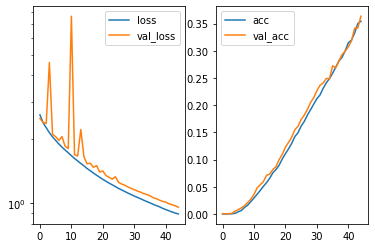

Predicted cell: NonMatureP1 Probability: [[0.93306655]]
True Cell type: NonMatureP1
X [[0.49019286]]
True positional value X 0.3148148148148148
Y [[0.4930002]]
True positional value Y 0.6851851851851852
H [[0.47645408]]
True positional value H 0.4074074074074074
W [[0.42543173]]
True positional value W 0.2962962962962963
C [[0.62964416]]
True positional value C 1.0


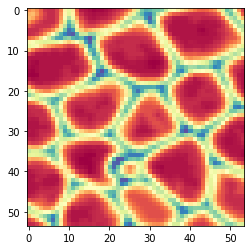

Epoch 46/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.8762 - acc: 0.3706 - val_loss: 0.9457 - val_acc: 0.3644

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.945748372194703, 'val_acc': 0.36440231663230344, 'loss': 0.8761561966243744, 'acc': 0.3705510594209317, 'lr': 1e-06}


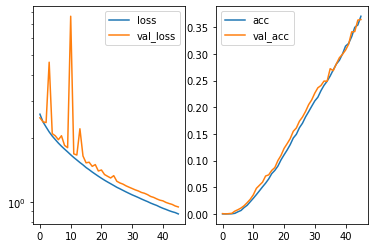

Predicted cell: MatureP1 Probability: [[0.92861074]]
True Cell type: MatureP1
X [[0.46810427]]
True positional value X 0.5
Y [[0.48404783]]
True positional value Y 0.3148148148148148
H [[0.4105046]]
True positional value H 0.2777777777777778
W [[0.32700846]]
True positional value W 0.3888888888888889
C [[0.5685025]]
True positional value C 1.0


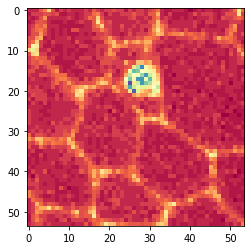

Epoch 47/250
36076/36076 [==============================] - 26s 719us/step - loss: 0.8652 - acc: 0.3793 - val_loss: 0.9364 - val_acc: 0.3702

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9363931477415116, 'val_acc': 0.37019484133517006, 'loss': 0.8652442216555947, 'acc': 0.37928262555502723, 'lr': 1e-06}


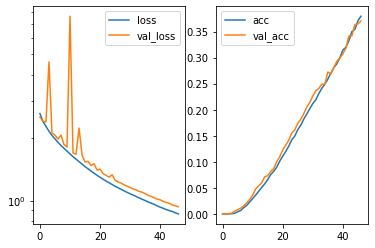

Predicted cell: MacroCheate Probability: [[0.9908937]]
True Cell type: MacroCheate
X [[0.45777923]]
True positional value X 0.3148148148148148
Y [[0.4961788]]
True positional value Y 0.3148148148148148
H [[0.5537844]]
True positional value H 0.5370370370370371
W [[0.6063014]]
True positional value W 0.6481481481481481
C [[0.6415969]]
True positional value C 1.0


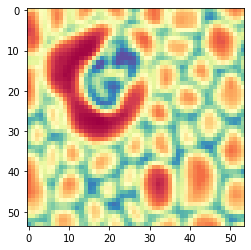

Epoch 48/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.8586 - acc: 0.3889 - val_loss: 0.9251 - val_acc: 0.3844

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9250608337998956, 'val_acc': 0.3844128456192308, 'loss': 0.8585709125903906, 'acc': 0.3889012074362136, 'lr': 1e-06}


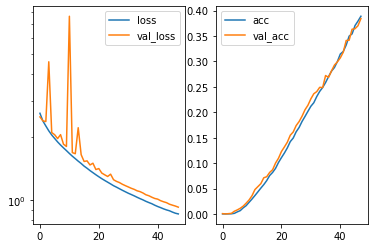

Predicted cell: MatureP1 Probability: [[0.8574369]]
True Cell type: MatureP1
X [[0.52876145]]
True positional value X 0.6851851851851852
Y [[0.43831366]]
True positional value Y 0.3148148148148148
H [[0.4148454]]
True positional value H 0.42592592592592593
W [[0.38625693]]
True positional value W 0.37037037037037035
C [[0.5729899]]
True positional value C 1.0


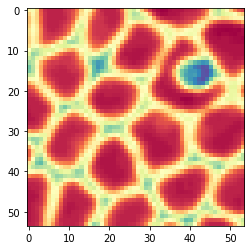

Epoch 49/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.8484 - acc: 0.4016 - val_loss: 0.9175 - val_acc: 0.3939

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9174992610681302, 'val_acc': 0.3938915200174451, 'loss': 0.8484489518055723, 'acc': 0.40159662755699616, 'lr': 1e-06}


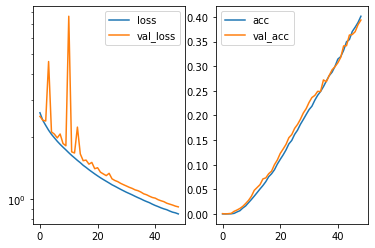

Predicted cell: MacroCheate Probability: [[0.99725074]]
True Cell type: MacroCheate
X [[0.6256114]]
True positional value X 0.6851851851851852
Y [[0.38795215]]
True positional value Y 0.5
H [[0.57816005]]
True positional value H 0.8888888888888888
W [[0.5801524]]
True positional value W 0.8518518518518519
C [[0.44153696]]
True positional value C 1.0


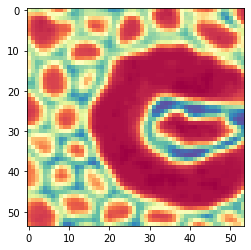

Epoch 50/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.8400 - acc: 0.4132 - val_loss: 0.9092 - val_acc: 0.4065

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.9092429040167569, 'val_acc': 0.4065297501158752, 'loss': 0.8399994834218298, 'acc': 0.4131832779286534, 'lr': 1e-06}


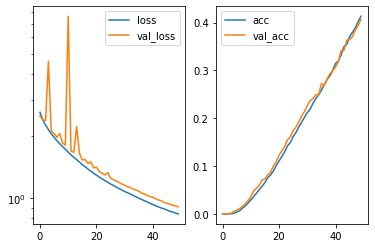

Predicted cell: NonMatureP1 Probability: [[0.84756017]]
True Cell type: NonMatureP1
X [[0.54256696]]
True positional value X 0.5
Y [[0.5423113]]
True positional value Y 0.5
H [[0.4337198]]
True positional value H 0.37037037037037035
W [[0.43673873]]
True positional value W 0.3148148148148148
C [[0.61014444]]
True positional value C 1.0


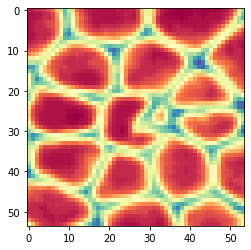

Epoch 51/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.8339 - acc: 0.4224 - val_loss: 0.8988 - val_acc: 0.4223

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8988185382127888, 'val_acc': 0.4223275416584125, 'loss': 0.8339098383904773, 'acc': 0.4223583522584727, 'lr': 1e-06}


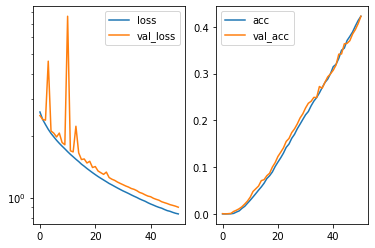

Predicted cell: MatureP1 Probability: [[0.8041242]]
True Cell type: MatureP1
X [[0.50756925]]
True positional value X 0.6851851851851852
Y [[0.4512066]]
True positional value Y 0.3148148148148148
H [[0.4443361]]
True positional value H 0.4444444444444444
W [[0.48393995]]
True positional value W 0.46296296296296297
C [[0.52955294]]
True positional value C 1.0


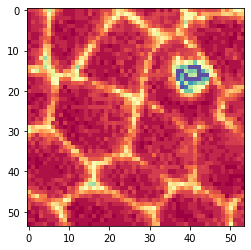

Epoch 52/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.8264 - acc: 0.4349 - val_loss: 0.8910 - val_acc: 0.4376

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.891003497090071, 'val_acc': 0.4375987355334938, 'loss': 0.8263943800773942, 'acc': 0.43485973771586756, 'lr': 1e-06}


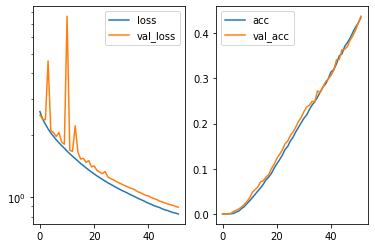

Predicted cell: MatureP1 Probability: [[0.9591098]]
True Cell type: MatureP1
X [[0.5123901]]
True positional value X 0.3148148148148148
Y [[0.41541648]]
True positional value Y 0.3148148148148148
H [[0.5145533]]
True positional value H 0.37037037037037035
W [[0.46355394]]
True positional value W 0.35185185185185186
C [[0.60622543]]
True positional value C 1.0


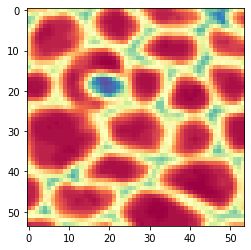

Epoch 53/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.8195 - acc: 0.4427 - val_loss: 0.8840 - val_acc: 0.4434

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8840487051349115, 'val_acc': 0.4433912576155138, 'loss': 0.8194566827177777, 'acc': 0.44273200719038525, 'lr': 1e-06}


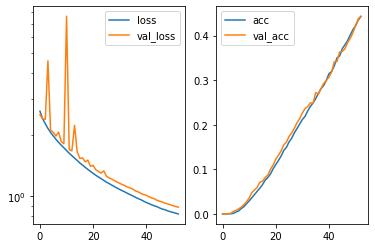

Predicted cell: Normal Probability: [[0.817653]]
True Cell type: Normal
X [[0.5125475]]
True positional value X 0.5
Y [[0.62398076]]
True positional value Y 0.5
H [[0.47082216]]
True positional value H 0.42592592592592593
W [[0.43670443]]
True positional value W 0.4074074074074074
C [[0.62235534]]
True positional value C 1.0


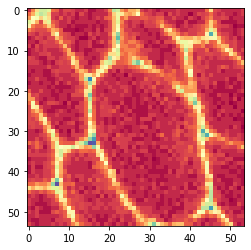

Epoch 54/250
36076/36076 [==============================] - 26s 719us/step - loss: 0.8126 - acc: 0.4531 - val_loss: 0.8763 - val_acc: 0.4571

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8763076877079241, 'val_acc': 0.4570826752177033, 'loss': 0.8125980685219584, 'acc': 0.4530990110200767, 'lr': 1e-06}


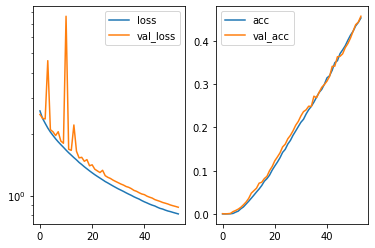

Predicted cell: MacroCheate Probability: [[0.92248905]]
True Cell type: MacroCheate
X [[0.67521715]]
True positional value X 0.6851851851851852
Y [[0.37992096]]
True positional value Y 0.3148148148148148
H [[0.25966474]]
True positional value H 0.2962962962962963
W [[0.5700519]]
True positional value W 0.2777777777777778
C [[0.4041621]]
True positional value C 1.0


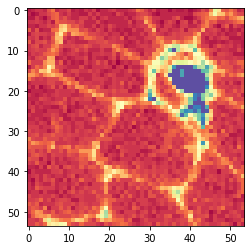

Epoch 55/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.8063 - acc: 0.4622 - val_loss: 0.8699 - val_acc: 0.4602

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.869940464373574, 'val_acc': 0.4602422314358109, 'loss': 0.8062853955921173, 'acc': 0.4622186468510396, 'lr': 1e-06}


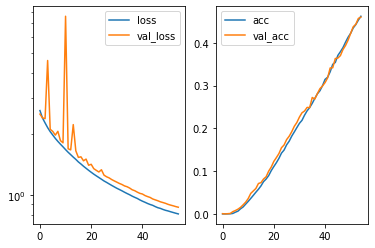

Predicted cell: Normal Probability: [[0.7288359]]
True Cell type: Normal
X [[0.5397162]]
True positional value X 0.5
Y [[0.47290334]]
True positional value Y 0.5
H [[0.47045723]]
True positional value H 0.35185185185185186
W [[0.51505935]]
True positional value W 0.3333333333333333
C [[0.5729357]]
True positional value C 1.0


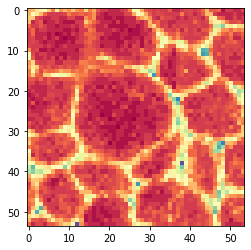

Epoch 56/250
36076/36076 [==============================] - 26s 714us/step - loss: 0.7981 - acc: 0.4754 - val_loss: 0.8625 - val_acc: 0.4681

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8624904780340169, 'val_acc': 0.46814112537091757, 'loss': 0.7980561031577778, 'acc': 0.4754130140662339, 'lr': 1e-06}


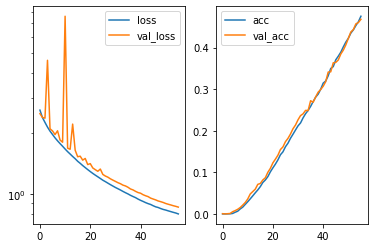

Predicted cell: NonMatureP1 Probability: [[0.9276749]]
True Cell type: NonMatureP1
X [[0.59931135]]
True positional value X 0.6851851851851852
Y [[0.5224422]]
True positional value Y 0.3148148148148148
H [[0.4912449]]
True positional value H 0.18518518518518517
W [[0.44076377]]
True positional value W 0.18518518518518517
C [[0.514463]]
True positional value C 0.0


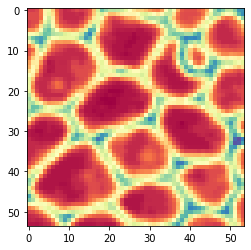

Epoch 57/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.7938 - acc: 0.4793 - val_loss: 0.8560 - val_acc: 0.4839

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8560071630563278, 'val_acc': 0.483938911138176, 'loss': 0.7938453234316624, 'acc': 0.479265990794161, 'lr': 1e-06}


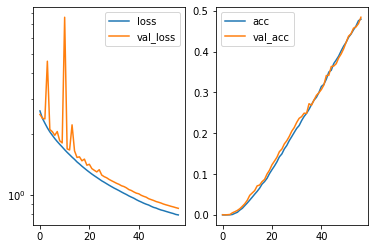

Predicted cell: MatureP1 Probability: [[0.9669166]]
True Cell type: MatureP1
X [[0.44134283]]
True positional value X 0.3148148148148148
Y [[0.47673374]]
True positional value Y 0.3148148148148148
H [[0.4262722]]
True positional value H 0.3333333333333333
W [[0.38497946]]
True positional value W 0.37037037037037035
C [[0.5994651]]
True positional value C 1.0


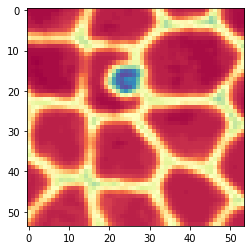

Epoch 58/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.7866 - acc: 0.4899 - val_loss: 0.8507 - val_acc: 0.4966

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8506588360521278, 'val_acc': 0.4965771438574527, 'loss': 0.7865613045945163, 'acc': 0.489937905696771, 'lr': 1e-06}


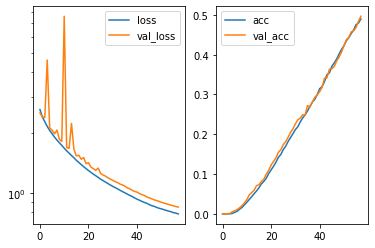

Predicted cell: Normal Probability: [[0.87504023]]
True Cell type: Normal
X [[0.5520593]]
True positional value X 0.5
Y [[0.49068782]]
True positional value Y 0.5
H [[0.48020488]]
True positional value H 0.46296296296296297
W [[0.46942127]]
True positional value W 0.46296296296296297
C [[0.5318595]]
True positional value C 1.0


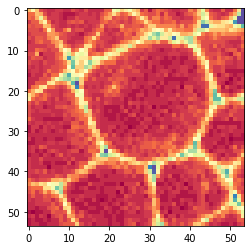

Epoch 59/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.7820 - acc: 0.4973 - val_loss: 0.8439 - val_acc: 0.5013

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8438954848311586, 'val_acc': 0.5013164753283621, 'loss': 0.7820195784218785, 'acc': 0.4973389487405854, 'lr': 1e-06}


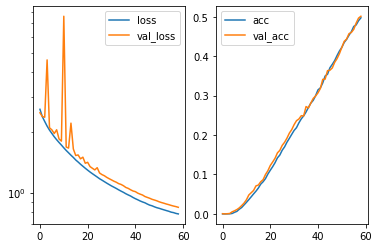

Predicted cell: MacroCheate Probability: [[0.99901056]]
True Cell type: MacroCheate
X [[0.5134511]]
True positional value X 0.5
Y [[0.48096922]]
True positional value Y 0.5
H [[0.6316103]]
True positional value H 0.5
W [[0.6707449]]
True positional value W 0.9814814814814815
C [[0.60870993]]
True positional value C 1.0


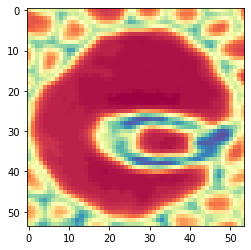

Epoch 60/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.7764 - acc: 0.5081 - val_loss: 0.8387 - val_acc: 0.5118

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8387468601917831, 'val_acc': 0.51184834192275, 'loss': 0.7763623827140048, 'acc': 0.5080663016034357, 'lr': 1e-06}


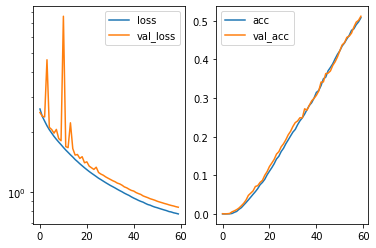

Predicted cell: MatureP1 Probability: [[0.8333035]]
True Cell type: MatureP1
X [[0.51710165]]
True positional value X 0.6851851851851852
Y [[0.44526422]]
True positional value Y 0.3148148148148148
H [[0.42397928]]
True positional value H 0.3148148148148148
W [[0.4362172]]
True positional value W 0.2962962962962963
C [[0.54602766]]
True positional value C 1.0


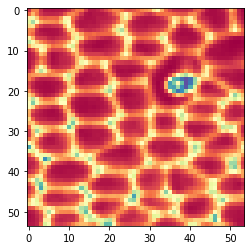

Epoch 61/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.7703 - acc: 0.5185 - val_loss: 0.8338 - val_acc: 0.5250

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8338084842042587, 'val_acc': 0.5250131587030512, 'loss': 0.7702806049075805, 'acc': 0.5184610239588933, 'lr': 1e-06}


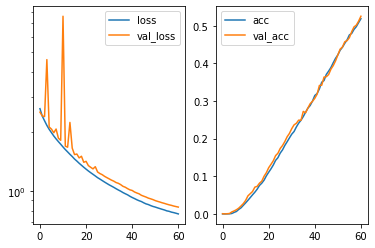

Predicted cell: MatureP1 Probability: [[0.93583333]]
True Cell type: MatureP1
X [[0.48907384]]
True positional value X 0.5
Y [[0.48724473]]
True positional value Y 0.3148148148148148
H [[0.54237044]]
True positional value H 0.4074074074074074
W [[0.36692435]]
True positional value W 0.3888888888888889
C [[0.57901514]]
True positional value C 1.0


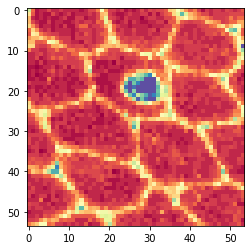

Epoch 62/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.7644 - acc: 0.5232 - val_loss: 0.8289 - val_acc: 0.5298

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8289050776560474, 'val_acc': 0.5297524938148973, 'loss': 0.7644319950060512, 'acc': 0.5231732982055405, 'lr': 1e-06}


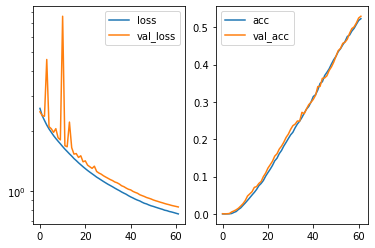

Predicted cell: MatureP1 Probability: [[0.99109054]]
True Cell type: MatureP1
X [[0.5138844]]
True positional value X 0.5
Y [[0.49668872]]
True positional value Y 0.5
H [[0.50563943]]
True positional value H 0.2962962962962963
W [[0.35724172]]
True positional value W 0.3148148148148148
C [[0.5766206]]
True positional value C 1.0


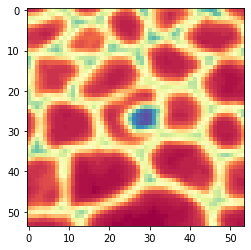

Epoch 63/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.7606 - acc: 0.5310 - val_loss: 0.8245 - val_acc: 0.5334

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8244559090974897, 'val_acc': 0.5334386477161546, 'loss': 0.7605682974089565, 'acc': 0.5310455692132966, 'lr': 1e-06}


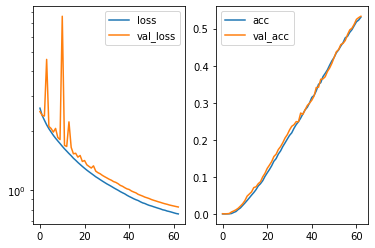

Predicted cell: MatureP1 Probability: [[0.867549]]
True Cell type: MatureP1
X [[0.50122756]]
True positional value X 0.5
Y [[0.514827]]
True positional value Y 0.5
H [[0.44561738]]
True positional value H 0.3333333333333333
W [[0.43851846]]
True positional value W 0.2777777777777778
C [[0.5498921]]
True positional value C 1.0


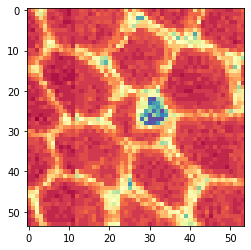

Epoch 64/250
36076/36076 [==============================] - 26s 719us/step - loss: 0.7577 - acc: 0.5376 - val_loss: 0.8202 - val_acc: 0.5413

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8202404881728957, 'val_acc': 0.5413375353737842, 'loss': 0.7576516231976111, 'acc': 0.5376150323058829, 'lr': 1e-06}


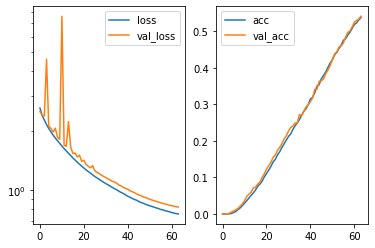

Predicted cell: MacroCheate Probability: [[0.9739925]]
True Cell type: MacroCheate
X [[0.62408215]]
True positional value X 0.6851851851851852
Y [[0.46426663]]
True positional value Y 0.6851851851851852
H [[0.43058798]]
True positional value H 0.4074074074074074
W [[0.650157]]
True positional value W 0.42592592592592593
C [[0.4276825]]
True positional value C 1.0


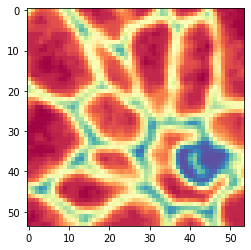

Epoch 65/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.7508 - acc: 0.5442 - val_loss: 0.8163 - val_acc: 0.5519

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8163467320785703, 'val_acc': 0.551869407743451, 'loss': 0.7508134836301477, 'acc': 0.5441844952068144, 'lr': 1e-06}


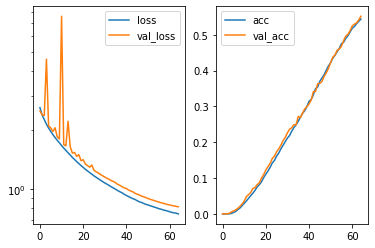

Predicted cell: Normal Probability: [[0.9413822]]
True Cell type: Normal
X [[0.5127314]]
True positional value X 0.5
Y [[0.51550967]]
True positional value Y 0.5
H [[0.5589364]]
True positional value H 0.4074074074074074
W [[0.48206216]]
True positional value W 0.37037037037037035
C [[0.5894741]]
True positional value C 1.0


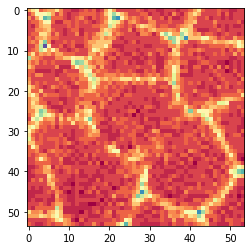

Epoch 66/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.7475 - acc: 0.5495 - val_loss: 0.8106 - val_acc: 0.5524

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.810646352044779, 'val_acc': 0.552395992338061, 'loss': 0.7475188539408569, 'acc': 0.5495343135649382, 'lr': 1e-06}


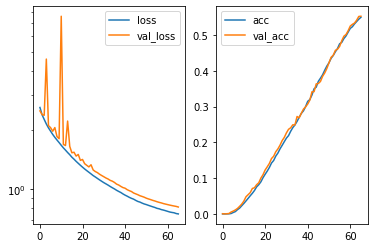

Predicted cell: MatureP1 Probability: [[0.9708164]]
True Cell type: MatureP1
X [[0.5664193]]
True positional value X 0.6851851851851852
Y [[0.4309402]]
True positional value Y 0.3148148148148148
H [[0.3672461]]
True positional value H 0.2222222222222222
W [[0.3941004]]
True positional value W 0.2962962962962963
C [[0.55715317]]
True positional value C 1.0


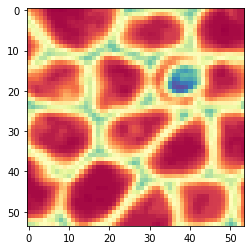

Epoch 67/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.7426 - acc: 0.5605 - val_loss: 0.8072 - val_acc: 0.5687

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.807234526245515, 'val_acc': 0.5687203847024866, 'loss': 0.742637732761479, 'acc': 0.5604557044715703, 'lr': 1e-06}


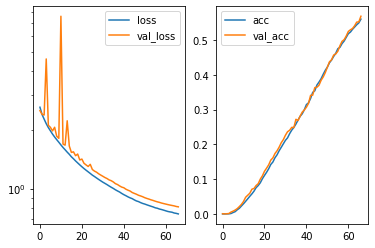

Predicted cell: NonMatureP1 Probability: [[0.74085474]]
True Cell type: NonMatureP1
X [[0.42464286]]
True positional value X 0.3148148148148148
Y [[0.547674]]
True positional value Y 0.5
H [[0.40197915]]
True positional value H 0.2777777777777778
W [[0.366158]]
True positional value W 0.2962962962962963
C [[0.5572219]]
True positional value C 1.0


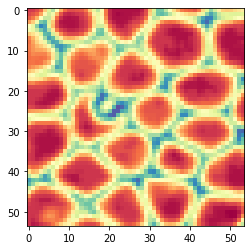

Epoch 68/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.7399 - acc: 0.5641 - val_loss: 0.8034 - val_acc: 0.5698

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.8034122629251023, 'val_acc': 0.569773572724138, 'loss': 0.7399497697009442, 'acc': 0.5640592063586217, 'lr': 1e-06}


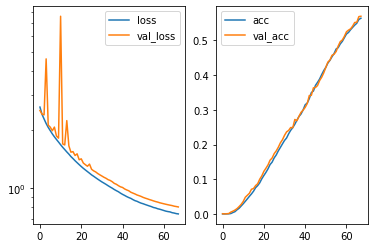

Predicted cell: MacroCheate Probability: [[0.99892646]]
True Cell type: MacroCheate
X [[0.34463215]]
True positional value X 0.5
Y [[0.5045222]]
True positional value Y 0.5
H [[0.5241829]]
True positional value H 0.6111111111111112
W [[0.5480964]]
True positional value W 0.5740740740740741
C [[0.49149996]]
True positional value C 1.0


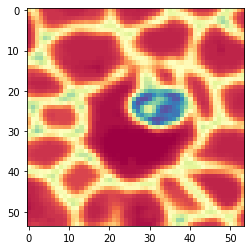

Epoch 69/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.7356 - acc: 0.5679 - val_loss: 0.7993 - val_acc: 0.5740

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7993235906341818, 'val_acc': 0.5739863122557891, 'loss': 0.7355929738614257, 'acc': 0.5679121834136838, 'lr': 1e-06}


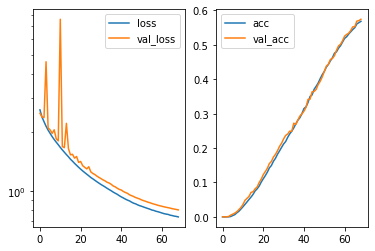

Predicted cell: Normal Probability: [[0.97657007]]
True Cell type: Normal
X [[0.42904165]]
True positional value X 0.5
Y [[0.47162318]]
True positional value Y 0.5
H [[0.55902505]]
True positional value H 0.4444444444444444
W [[0.5299064]]
True positional value W 0.35185185185185186
C [[0.47631955]]
True positional value C 1.0


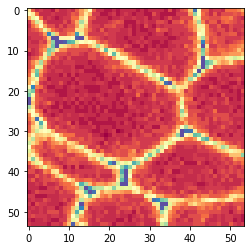

Epoch 70/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.7312 - acc: 0.5762 - val_loss: 0.7961 - val_acc: 0.5850

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7961154025187299, 'val_acc': 0.5850447608396341, 'loss': 0.7311502122035747, 'acc': 0.5762279612623623, 'lr': 1e-06}


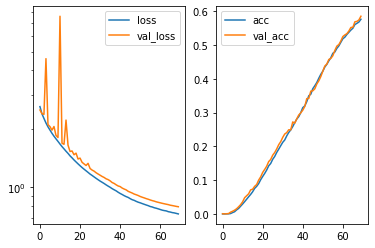

Predicted cell: MacroCheate Probability: [[0.98465234]]
True Cell type: MacroCheate
X [[0.43797186]]
True positional value X 0.3148148148148148
Y [[0.5538816]]
True positional value Y 0.6851851851851852
H [[0.59910977]]
True positional value H 0.5925925925925926
W [[0.5777658]]
True positional value W 0.5925925925925926
C [[0.7603072]]
True positional value C 1.0


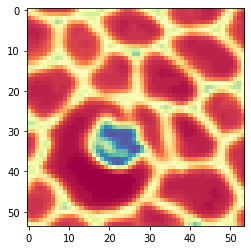

Epoch 71/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.7286 - acc: 0.5802 - val_loss: 0.7923 - val_acc: 0.5877

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.792335367441303, 'val_acc': 0.587677723046916, 'loss': 0.7285741798324429, 'acc': 0.5801640967728492, 'lr': 1e-06}


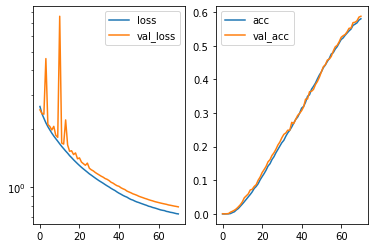

Predicted cell: NonMatureP1 Probability: [[0.49577242]]
True Cell type: NonMatureP1
X [[0.50015205]]
True positional value X 0.6851851851851852
Y [[0.56561947]]
True positional value Y 0.3148148148148148
H [[0.4346428]]
True positional value H 0.42592592592592593
W [[0.5691104]]
True positional value W 0.35185185185185186
C [[0.5103847]]
True positional value C 1.0


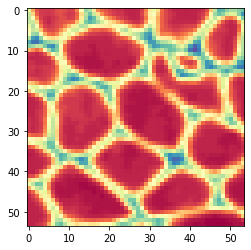

Epoch 72/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.7257 - acc: 0.5860 - val_loss: 0.7888 - val_acc: 0.5887

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7887835143866697, 'val_acc': 0.5887309110685673, 'loss': 0.725744418690006, 'acc': 0.5859574228574728, 'lr': 1e-06}


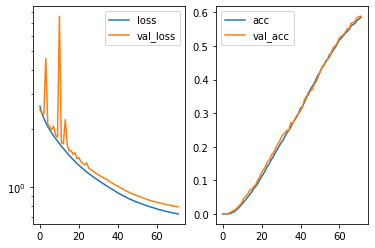

Predicted cell: MacroCheate Probability: [[0.9976047]]
True Cell type: MacroCheate
X [[0.4644677]]
True positional value X 0.5
Y [[0.71599925]]
True positional value Y 0.3148148148148148
H [[0.40578157]]
True positional value H 0.18518518518518517
W [[0.53321445]]
True positional value W 0.18518518518518517
C [[0.5754025]]
True positional value C 0.0


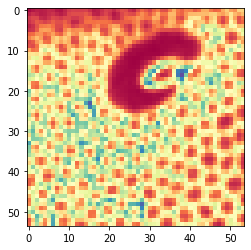

Epoch 73/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.7209 - acc: 0.5926 - val_loss: 0.7843 - val_acc: 0.5956

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.784281838373362, 'val_acc': 0.5955766232594997, 'loss': 0.7209272241761592, 'acc': 0.5925823253642325, 'lr': 1e-06}


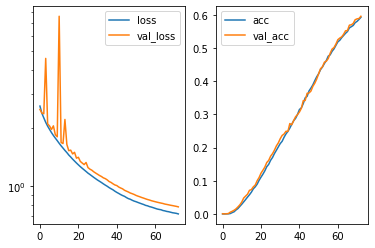

Predicted cell: MatureP1 Probability: [[0.94771945]]
True Cell type: MatureP1
X [[0.59592366]]
True positional value X 0.6851851851851852
Y [[0.45787904]]
True positional value Y 0.3148148148148148
H [[0.36590365]]
True positional value H 0.37037037037037035
W [[0.42998216]]
True positional value W 0.4074074074074074
C [[0.5384892]]
True positional value C 1.0


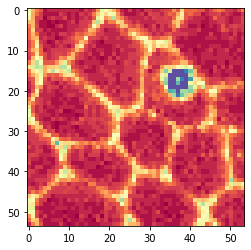

Epoch 74/250
36076/36076 [==============================] - 26s 722us/step - loss: 0.7172 - acc: 0.5932 - val_loss: 0.7818 - val_acc: 0.5956

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7817524522150611, 'val_acc': 0.5955766201207612, 'loss': 0.7172104877291001, 'acc': 0.5932475867061529, 'lr': 1e-06}


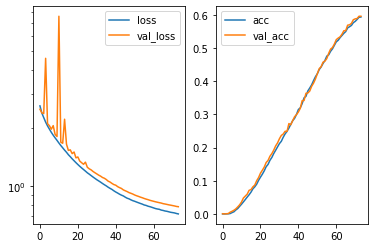

Predicted cell: Normal Probability: [[0.82768285]]
True Cell type: MacroCheate
X [[0.5005931]]
True positional value X 0.3148148148148148
Y [[0.5943849]]
True positional value Y 0.6851851851851852
H [[0.43713686]]
True positional value H 0.16666666666666666
W [[0.39964908]]
True positional value W 0.14814814814814814
C [[0.6230767]]
True positional value C 1.0


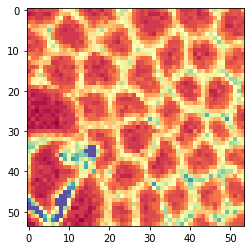

Epoch 75/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.7151 - acc: 0.6014 - val_loss: 0.7780 - val_acc: 0.6056

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7779833666584001, 'val_acc': 0.6055818838530808, 'loss': 0.7150607007823216, 'acc': 0.6014247693584874, 'lr': 1e-06}


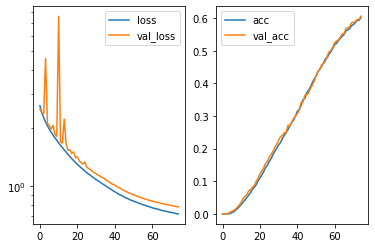

Predicted cell: Normal Probability: [[0.97561955]]
True Cell type: Normal
X [[0.5493892]]
True positional value X 0.5
Y [[0.51051044]]
True positional value Y 0.5
H [[0.46165812]]
True positional value H 0.2777777777777778
W [[0.53240615]]
True positional value W 0.48148148148148145
C [[0.5076272]]
True positional value C 1.0


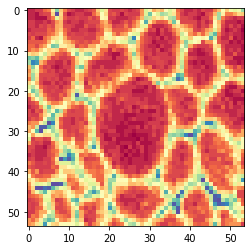

Epoch 76/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.7097 - acc: 0.6073 - val_loss: 0.7758 - val_acc: 0.6061

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7758132334192406, 'val_acc': 0.6061084846435816, 'loss': 0.7097482895927797, 'acc': 0.6073012519654658, 'lr': 1e-06}


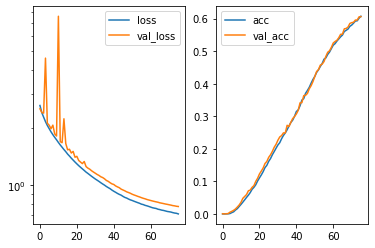

Predicted cell: Normal Probability: [[0.9317553]]
True Cell type: Normal
X [[0.5958031]]
True positional value X 0.5
Y [[0.54358953]]
True positional value Y 0.5
H [[0.4430152]]
True positional value H 0.37037037037037035
W [[0.48951077]]
True positional value W 0.46296296296296297
C [[0.53112996]]
True positional value C 1.0


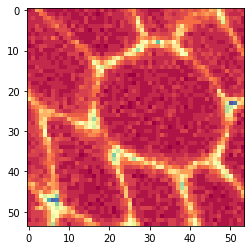

Epoch 77/250
36076/36076 [==============================] - 26s 719us/step - loss: 0.7085 - acc: 0.6143 - val_loss: 0.7722 - val_acc: 0.6093

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7722013507660217, 'val_acc': 0.609268040359491, 'loss': 0.7085400939595741, 'acc': 0.6142865051212325, 'lr': 1e-06}


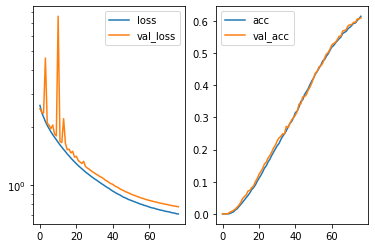

Predicted cell: MatureP1 Probability: [[0.9634415]]
True Cell type: MatureP1
X [[0.66100156]]
True positional value X 0.6851851851851852
Y [[0.51332855]]
True positional value Y 0.6851851851851852
H [[0.42754412]]
True positional value H 0.4074074074074074
W [[0.5162734]]
True positional value W 0.37037037037037035
C [[0.50057477]]
True positional value C 1.0


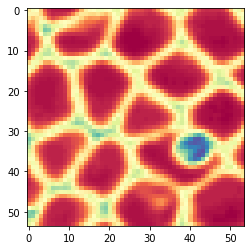

Epoch 78/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.7038 - acc: 0.6165 - val_loss: 0.7689 - val_acc: 0.6166

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7688796783259444, 'val_acc': 0.6166403418531413, 'loss': 0.7037939661251545, 'acc': 0.6164763271775581, 'lr': 1e-06}


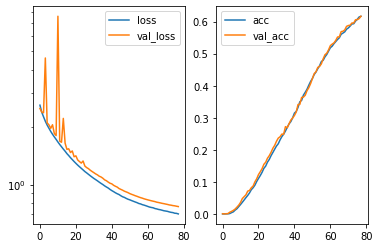

Predicted cell: MatureP1 Probability: [[0.9877582]]
True Cell type: MatureP1
X [[0.499758]]
True positional value X 0.3148148148148148
Y [[0.44447964]]
True positional value Y 0.5
H [[0.41621995]]
True positional value H 0.3148148148148148
W [[0.4375643]]
True positional value W 0.3148148148148148
C [[0.60096526]]
True positional value C 1.0


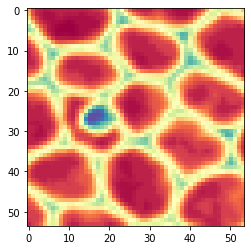

Epoch 79/250
36076/36076 [==============================] - 26s 715us/step - loss: 0.7028 - acc: 0.6206 - val_loss: 0.7670 - val_acc: 0.6209

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7670166103886328, 'val_acc': 0.6208530834877473, 'loss': 0.7027809328984786, 'acc': 0.6205510591466671, 'lr': 1e-06}


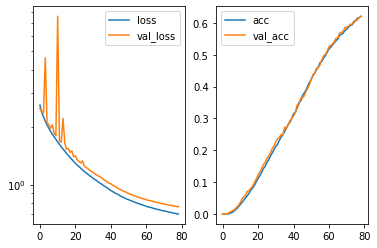

Predicted cell: MatureP1 Probability: [[0.99495584]]
True Cell type: MatureP1
X [[0.5296885]]
True positional value X 0.3148148148148148
Y [[0.55804265]]
True positional value Y 0.6851851851851852
H [[0.37462366]]
True positional value H 0.3148148148148148
W [[0.44381738]]
True positional value W 0.2962962962962963
C [[0.6464762]]
True positional value C 1.0


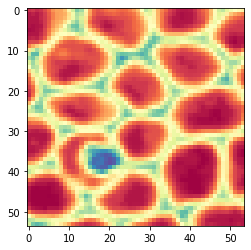

Epoch 80/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.6992 - acc: 0.6250 - val_loss: 0.7632 - val_acc: 0.6219

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7632370687836783, 'val_acc': 0.6219062652319215, 'loss': 0.6992069127250635, 'acc': 0.6249584216991699, 'lr': 1e-06}


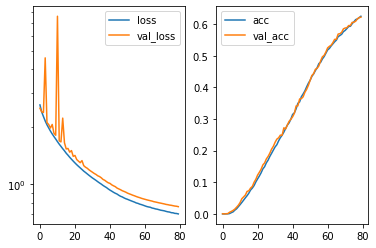

Predicted cell: Normal Probability: [[0.9492747]]
True Cell type: Normal
X [[0.6019044]]
True positional value X 0.5
Y [[0.37050933]]
True positional value Y 0.5
H [[0.5247564]]
True positional value H 0.8333333333333334
W [[0.59434974]]
True positional value W 0.48148148148148145
C [[0.52601105]]
True positional value C 1.0


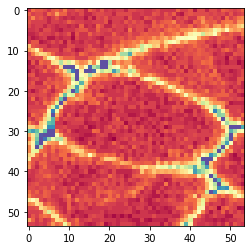

Epoch 81/250
36076/36076 [==============================] - 26s 716us/step - loss: 0.6957 - acc: 0.6334 - val_loss: 0.7613 - val_acc: 0.6240

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7612611800510674, 'val_acc': 0.6240126381364856, 'loss': 0.6956858227450959, 'acc': 0.6333850753956325, 'lr': 1e-06}


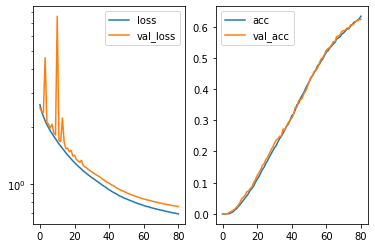

Predicted cell: NonMatureP1 Probability: [[0.99149317]]
True Cell type: NonMatureP1
X [[0.49938548]]
True positional value X 0.3148148148148148
Y [[0.49093267]]
True positional value Y 0.5
H [[0.45669678]]
True positional value H 0.3888888888888889
W [[0.48222712]]
True positional value W 0.3888888888888889
C [[0.5394362]]
True positional value C 1.0


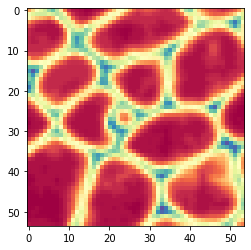

Epoch 82/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.6949 - acc: 0.6310 - val_loss: 0.7586 - val_acc: 0.6372

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7585670731769479, 'val_acc': 0.6371774575219398, 'loss': 0.6949454535004146, 'acc': 0.6310012204933357, 'lr': 1e-06}


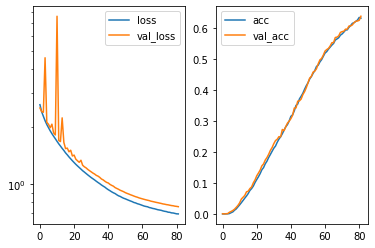

Predicted cell: MacroCheate Probability: [[0.9958138]]
True Cell type: MacroCheate
X [[0.4810039]]
True positional value X 0.3148148148148148
Y [[0.42754942]]
True positional value Y 0.3148148148148148
H [[0.55947196]]
True positional value H 0.5925925925925926
W [[0.6269939]]
True positional value W 0.5370370370370371
C [[0.6220875]]
True positional value C 1.0


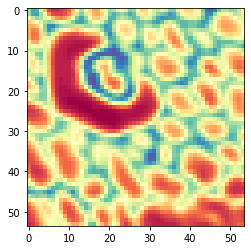

Epoch 83/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.6933 - acc: 0.6361 - val_loss: 0.7559 - val_acc: 0.6398

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7558518307280578, 'val_acc': 0.6398104144875284, 'loss': 0.6933396542160853, 'acc': 0.6361292817036426, 'lr': 1e-06}


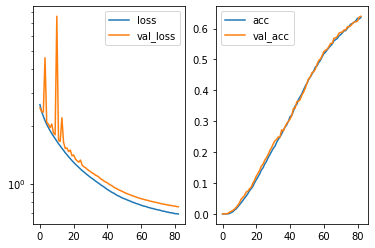

Predicted cell: MacroCheate Probability: [[0.9992987]]
True Cell type: MacroCheate
X [[0.6540933]]
True positional value X 0.6851851851851852
Y [[0.49093777]]
True positional value Y 0.6851851851851852
H [[0.52810335]]
True positional value H 0.46296296296296297
W [[0.6632285]]
True positional value W 0.6851851851851852
C [[0.4496398]]
True positional value C 1.0


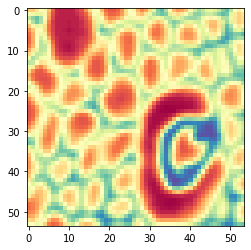

Epoch 84/250
36076/36076 [==============================] - 26s 721us/step - loss: 0.6887 - acc: 0.6448 - val_loss: 0.7538 - val_acc: 0.6361

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7537679648386798, 'val_acc': 0.6361242642585951, 'loss': 0.6886685966176487, 'acc': 0.6448331308452104, 'lr': 1e-06}


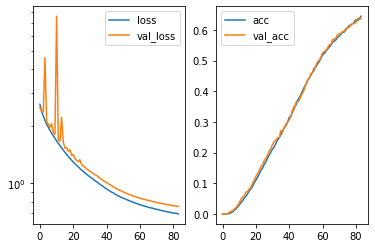

Predicted cell: MacroCheate Probability: [[0.99743587]]
True Cell type: MacroCheate
X [[0.57497156]]
True positional value X 0.5
Y [[0.5009866]]
True positional value Y 0.3148148148148148
H [[0.45403442]]
True positional value H 0.46296296296296297
W [[0.5274556]]
True positional value W 0.3333333333333333
C [[0.5532508]]
True positional value C 1.0


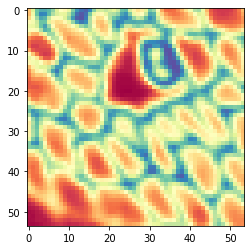

Epoch 85/250
36076/36076 [==============================] - 26s 720us/step - loss: 0.6862 - acc: 0.6484 - val_loss: 0.7507 - val_acc: 0.6435

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7507160061469136, 'val_acc': 0.6434965668194165, 'loss': 0.6862126986141651, 'acc': 0.6484089153266849, 'lr': 1e-06}


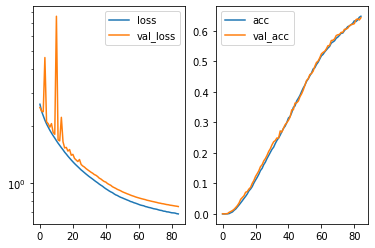

Predicted cell: MacroCheate Probability: [[0.9997137]]
True Cell type: MacroCheate
X [[0.2927447]]
True positional value X 0.3148148148148148
Y [[0.52985454]]
True positional value Y 0.5
H [[0.55480236]]
True positional value H 0.6296296296296297
W [[0.5923681]]
True positional value W 0.6851851851851852
C [[0.64428174]]
True positional value C 1.0


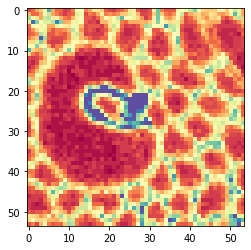

Epoch 86/250
36076/36076 [==============================] - 26s 718us/step - loss: 0.6831 - acc: 0.6519 - val_loss: 0.7490 - val_acc: 0.6514

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7490302471815755, 'val_acc': 0.6513954722736935, 'loss': 0.6831370933923744, 'acc': 0.6519015430875411, 'lr': 1e-06}


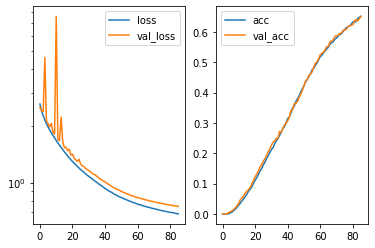

Predicted cell: MacroCheate Probability: [[0.9485249]]
True Cell type: MacroCheate
X [[0.55159163]]
True positional value X 0.3148148148148148
Y [[0.704467]]
True positional value Y 0.6851851851851852
H [[0.5192454]]
True positional value H 0.6666666666666666
W [[0.50508153]]
True positional value W 0.9629629629629629
C [[0.5298224]]
True positional value C 1.0


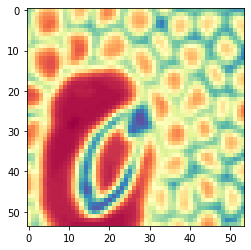

Epoch 87/250
36076/36076 [==============================] - 26s 717us/step - loss: 0.6824 - acc: 0.6517 - val_loss: 0.7461 - val_acc: 0.6461

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d47V1f48.h5
{'val_loss': 0.7460831346293385, 'val_acc': 0.6461295353041755, 'loss': 0.6824117927226646, 'acc': 0.651652068160751, 'lr': 1e-06}


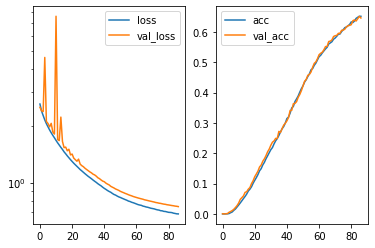

Predicted cell: Normal Probability: [[0.97224146]]
True Cell type: Normal
X [[0.5827572]]
True positional value X 0.5
Y [[0.47160324]]
True positional value Y 0.5
H [[0.5048441]]
True positional value H 0.37037037037037035
W [[0.51756966]]
True positional value W 0.42592592592592593
C [[0.575897]]
True positional value C 1.0


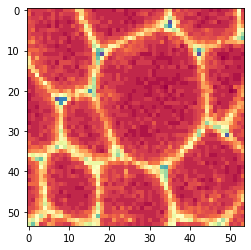

Epoch 88/250
15500/36076 [===========>..................] - ETA: 14s - loss: 0.6788 - acc: 0.6531

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
